In [6]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage.io import imread_collection
import scipy.io as sio
from google.colab import drive
import skimage.io
import skimage.color
import skimage.transform
import random
from platform import python_version

print(tf.__version__)
print(python_version())

1.15.0-rc3
3.6.8


In [7]:
# Prep data import from my google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Import landmark features - not relevant here

# mat_image = sio.loadmat('/content/drive/My Drive/Emotion recognition data/points/0001.mat')
# print(mat_image)

# np_image = np.asarray(mat_image)
# print(np_image)

In [0]:
# Select directory for image import
col_dir = '/content/drive/My Drive/Emotion recognition data/images_final/*.jpg'

In [0]:
# Create a collection with the available images
images = imread_collection(col_dir)

In [10]:
len(images)

2493

In [0]:
#from PIL import Image
#import glob

#image_list = []

#for filename in glob.glob('/content/drive/My Drive/Emotion recognition data/images_final/*.jpg'):
#    im=Image.open(filename)
#    image_list.append(im)

In [11]:
print(images[0].shape)
print(images[1].shape)
print(images[2].shape)

(750, 1000, 3)
(750, 1000, 3)
(750, 1000, 3)


In [0]:
display(images[0])

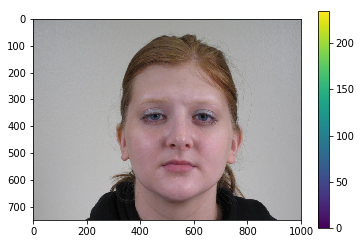

[[[152 153 157]
  [150 151 155]
  [149 150 154]
  ...
  [154 155 159]
  [151 152 156]
  [150 151 155]]

 [[151 152 156]
  [149 150 154]
  [148 149 153]
  ...
  [153 154 158]
  [151 152 156]
  [150 151 155]]

 [[151 152 156]
  [148 149 153]
  [146 147 151]
  ...
  [153 154 158]
  [151 152 156]
  [150 151 155]]

 ...

 [[159 159 159]
  [159 159 159]
  [158 158 158]
  ...
  [166 166 166]
  [165 165 165]
  [165 165 165]]

 [[158 158 158]
  [158 158 158]
  [158 158 158]
  ...
  [165 165 165]
  [165 165 165]
  [165 165 165]]

 [[158 158 158]
  [158 158 158]
  [158 158 158]
  ...
  [165 165 165]
  [165 165 165]
  [164 164 164]]]


In [12]:
# Plot first image

plt.figure()
plt.imshow(images[0])
plt.colorbar()
plt.grid(False)
plt.show()

print(images[0])

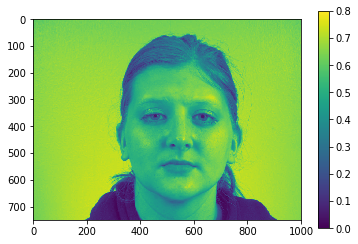

[[0.60029765 0.59245451 0.58853294 ... 0.60814078 0.59637608 0.59245451]
 [0.59637608 0.58853294 0.58461137 ... 0.60421922 0.59637608 0.59245451]
 [0.59637608 0.58461137 0.57676824 ... 0.60421922 0.59637608 0.59245451]
 ...
 [0.62352941 0.62352941 0.61960784 ... 0.65098039 0.64705882 0.64705882]
 [0.61960784 0.61960784 0.61960784 ... 0.64705882 0.64705882 0.64705882]
 [0.61960784 0.61960784 0.61960784 ... 0.64705882 0.64705882 0.64313725]]


In [131]:
# Play around: Change image to gray

image_gray = skimage.color.rgb2gray(images[0])

plt.figure()
plt.imshow(image_gray)
plt.colorbar()
plt.grid(False)
plt.show()

print(image_gray)

In [0]:
# img_hsv = skimage.color.convert_colorspace(images, 'RGB', 'HSV')

In [0]:
#for idx,frame in enumerate(images):
#     print(frame.shape)     
#     print(idx) 
      
# Not all images same size...   

In [132]:
type(images)

skimage.io.collection.ImageCollection

In [0]:
# Sort out the 6 too big images - or divide by 4 the first two values

# 57, 192, 1569, 2048, 2309, 2333 - ?


In [0]:
# SHUFFLE IMAGES

images_arr = skimage.io.collection.concatenate_images(images)

np.random.seed(1)

np.random.shuffle(images_arr)

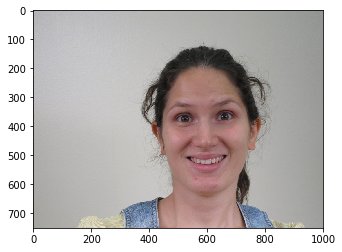

In [14]:
# We see the images have changed order

plt.figure()
plt.imshow(images_arr[0])
plt.grid(False)
plt.show()

In [0]:
# But now we need to shuffle the labels the same way

# Import labels

labels = pd.read_csv('/content/drive/My Drive/Emotion recognition data/label.csv')

In [17]:
print(labels.head)
len(labels)

<bound method NDFrame.head of       Unnamed: 0  Index  identity  emotion_idx      emotion_cat      type
0              1      1       111            1          Neutral    simple
1              2      2       114            1          Neutral    simple
2              3      3       115            1          Neutral    simple
3              4      4       116            1          Neutral    simple
4              5      5       117            1          Neutral    simple
5              6      6       119            1          Neutral    simple
6              7      7       123            1          Neutral    simple
7              8      8       128            1          Neutral    simple
8              9      9       130            1          Neutral    simple
9             10     10       132            1          Neutral    simple
10            11     11       135            1          Neutral    simple
11            12     12       141            1          Neutral    simple
12      

2500

In [148]:
type(labels)

pandas.core.frame.DataFrame

In [0]:
labels_final = labels.drop([57,190,1557,2032,2291,2295,2315], axis=0)

In [150]:
labels_final

,Unnamed: 0,Index,identity,emotion_idx,emotion_cat,type
0,1,1,111,1,Neutral,simple
1,2,2,114,1,Neutral,simple
2,3,3,115,1,Neutral,simple
3,4,4,116,1,Neutral,simple
4,5,5,117,1,Neutral,simple
5,6,6,119,1,Neutral,simple
6,7,7,123,1,Neutral,simple
7,8,8,128,1,Neutral,simple
8,9,9,130,1,Neutral,simple
9,10,10,132,1,Neutral,simple


In [0]:
labels_final = labels_final.iloc[:, 3]

In [0]:
# Get all labels
# all_labels = labels.iloc[:, 4]

# all_labels.unique()

In [0]:
# First remove the labels for the sorted out pictures
# Somehow label amount and images amount does not match. Strange here

In [20]:
labels_final

0        1
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
29       1
        ..
2470    22
2471    22
2472    22
2473    22
2474    22
2475    22
2476    22
2477    22
2478    22
2479    22
2480    22
2481    22
2482    22
2483    22
2484    22
2485    22
2486    22
2487    22
2488    22
2489    22
2490    22
2491    22
2492    22
2493    22
2494    22
2495    22
2496    22
2497    22
2498    22
2499    22
Name: emotion_idx, Length: 2493, dtype: int64

In [153]:
type(labels_final)

pandas.core.series.Series

In [0]:
labels_f = pd.Series.to_numpy(labels_final)

In [22]:
labels_f
len(labels_f)

2493

In [0]:
# Shuffle labels
np.random.seed(1)

np.random.shuffle(labels_f)

In [18]:
labels_f

array([ 8, 12,  6, ..., 10,  3, 10])

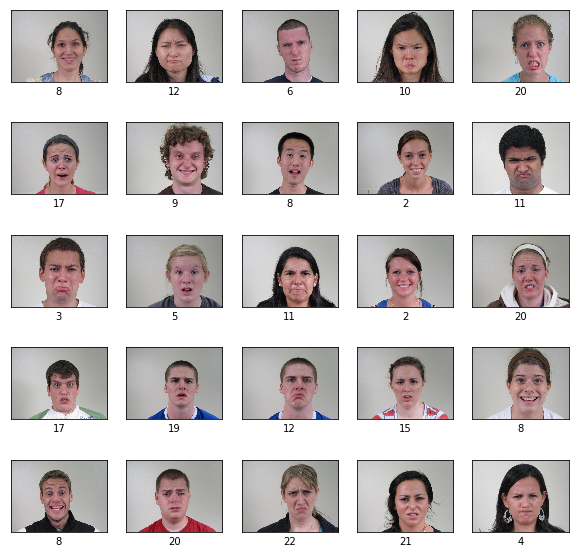

In [24]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images_arr[i], cmap=plt.cm.binary)
    plt.xlabel(labels_f[i])
plt.show()

# HINT: classes = {'Neutral':0, 'Happy':1, 'Sad':2, 'Angry':3, 'Surprised':4, 'Disgusted':5,
#       'Fearful':6, 'Happily surprised':6, 'Happily disgusted':7, 'Sadly angry':8,
#       'Angrily disgusted':9, 'Appalled':10, 'Hatred':11, 'Angrily surprised':12,
#       'Sadly surprised':13, 'Disgustedly surprised':14, 'Fearfully surprised':15,
#       'Awed':16, 'Sadly fearful':17, 'Fearfully disgusted':18, 'Fearfully angry':19,
#       'Sadly disgusted':20}

# LOOKS OK

In [0]:
# Convert all images to gray 

#images_grey = skimage.color.rgb2gray(images_arr)

In [19]:
image_gray = skimage.color.rgb2gray(images_arr[0])

image_gray

image_gray.shape

(750, 1000)

In [0]:
images_new = images_arr[0:2]

print(images_new)

In [0]:
# Convert all images to grey 

images_grey = []

for i in range(len(images_arr)):
  image_gray = skimage.color.rgb2gray(images_arr[i])
  images_grey.append(image_gray)
  

In [21]:
print(len(images_grey))
print(type(images_grey))

2493
<class 'list'>


In [26]:
# Resize all images 

images_final = []

for i in range(len(images_grey)):
  image_rescaled = skimage.transform.rescale(images_grey[i], 0.10, anti_aliasing = True)
  images_final.append(image_rescaled)

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '


In [23]:
print(len(images_final))
print(type(images_final))

2493
<class 'list'>


In [24]:
images_final[1]

array([[0.76115463, 0.76348828, 0.76525267, ..., 0.62904869, 0.62836494,
        0.62664696],
       [0.7643992 , 0.76826943, 0.76990347, ..., 0.63040479, 0.6277479 ,
        0.62603106],
       [0.76777448, 0.77231889, 0.77163178, ..., 0.6295409 , 0.62697321,
        0.62455595],
       ...,
       [0.71535673, 0.71933786, 0.72475401, ..., 0.68659855, 0.68451157,
        0.67912563],
       [0.71380373, 0.71772745, 0.72189315, ..., 0.68580867, 0.68353035,
        0.68107179],
       [0.70648675, 0.71333688, 0.71860001, ..., 0.66118204, 0.68462237,
        0.68441073]])

In [0]:
# images_ff = np.hstack(images_final)

In [0]:
#images_nn = np.concatenate(images_final, axis=0)

In [171]:
#len(images_nn)

186975

In [0]:
images_nn = np.asarray(images_final)

In [28]:
len(images_nn)

2493

In [29]:
images_nn[1].shape

(75, 100)

In [30]:
# Select train images - all must be same shape
train_images = images_nn[0:2000]
len(train_images)

2000

In [0]:
# Concatenate images
# train_images = skimage.io.collection.concatenate_images(train_images)

In [31]:
# Select test images
test_images = images_nn[2000:2493]
len(test_images)

493

In [32]:
# Select train labels
train_labels = labels_f[0:2000]
len(train_labels)

2000

In [0]:
# Get all labels
# all_labels = labels.iloc[:, 4]

# all_labels.unique()

In [0]:
# Create dictionary with classes for later

# classes = {'Neutral':0, 'Happy':1, 'Sad':2, 'Angry':3, 'Surprised':4, 'Disgusted':5,
#       'Fearful':6, 'Happily surprised':6, 'Happily disgusted':7, 'Sadly angry':8,
#       'Angrily disgusted':9, 'Appalled':10, 'Hatred':11, 'Angrily surprised':12,
#       'Sadly surprised':13, 'Disgustedly surprised':14, 'Fearfully surprised':15,
#       'Awed':16, 'Sadly fearful':17, 'Fearfully disgusted':18, 'Fearfully angry':19,
#       'Sadly disgusted':20}

In [33]:
# Select test labels
test_labels = labels_f[2000:2493]
len(test_labels)

493

In [193]:
train_labels

array([ 8, 12,  6, ...,  8, 17, 22])

In [0]:
# Building the model

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(75, 100)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(23, activation='softmax')
])

In [0]:
# Building the model

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(75, 100, 1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(keras.layers.Conv2D(64, (5, 5), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1000, activation='relu'))
model.add(keras.layers.Dense(23, activation='softmax'))


In [0]:
# Building the model

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(75, 100, 1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1000, activation='relu'))
model.add(keras.layers.Dense(23, activation='softmax'))

In [0]:
# Building the model

model = keras.Sequential()
model.add(keras.layers.Conv2D(20, kernel_size=(6, 6), strides=(1, 1),
                 activation='relu',
                 input_shape=(75, 100, 1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(23, activation='softmax'))

In [0]:
# Building the model

model = keras.Sequential()
model.add(keras.layers.Conv2D(20, kernel_size=(6, 6), strides=(1, 1),
                 activation='relu',
                 input_shape=(75, 100, 1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(23, activation='softmax'))

In [0]:
# Compile model

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
data = train_images.reshape(2000,75,100,1)

In [86]:
# Train model

model.fit(data, train_labels, epochs=10)

Train on 2000 samples
Epoch 1/10
2000/2000 [==============================] - 6s 3ms/sample - loss: 1.8017 - acc: 0.4375
Epoch 2/10
2000/2000 [==============================] - 6s 3ms/sample - loss: 1.5937 - acc: 0.5205
Epoch 3/10
2000/2000 [==============================] - 6s 3ms/sample - loss: 1.4422 - acc: 0.5695
Epoch 4/10
2000/2000 [==============================] - 6s 3ms/sample - loss: 1.3172 - acc: 0.6135
Epoch 5/10
2000/2000 [==============================] - 6s 3ms/sample - loss: 1.1952 - acc: 0.6555
Epoch 6/10
2000/2000 [==============================] - 6s 3ms/sample - loss: 1.0750 - acc: 0.6970
Epoch 7/10
2000/2000 [==============================] - 6s 3ms/sample - loss: 0.9493 - acc: 0.7430
Epoch 8/10
2000/2000 [==============================] - 6s 3ms/sample - loss: 0.8453 - acc: 0.7650
Epoch 9/10
2000/2000 [==============================] - 6s 3ms/sample - loss: 0.7457 - acc: 0.8105
Epoch 10/10
2000/2000 [==============================] - 6s 3ms/sample - loss: 0.6459 -

In [0]:
test_data = test_images.reshape(493,75,100,1)

In [82]:
test_loss, test_acc = model.evaluate(test_data,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

493/493 - 1s - loss: 3.2083 - acc: 0.1014

Test accuracy: 0.10141988


In [0]:
## MODEL OVERFITS